# <font color="darkblue"> Prática 02: Algoritmo k-NN </font>

### Ruy de Morais e Silva - 20190175695

**Objetivos:**


*   Aplicar o algoritmo k-NN a um problema prático.
*   Apresentar as funções do Scikit-Learn que lidam com o k-NN.



**Descrição:**

Implemente duas versões de um classificador usando o algoritmo k-NN que identifica dígitos escritos à mão a partir de um conjunto de imagens. Utilize o dataset <i> Digits </i> da biblioteca Scikit-Learn. Na primeira versão, você implementará o algoritmo de classificação do zero, enquanto que na segunda você deverá utilizar a biblioteca Scikit-Learn para realizar a classificação. Ao final, compare as acurácias obtidas e o tempo de execução de cada versão.

# <font color="darkblue"> Solução </font>

### Descrição do Dataset

In [1]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

digits = load_digits()

# Conhecendo dataset 
print(digits.DESCR + "\n\n")

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

### Exibição das imagens

opa
opa
opa
opa


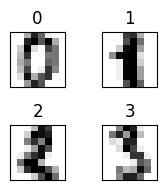

In [2]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(2, 2))

for item in zip(axes.ravel(), digits.images, digits.target):
    print("opa")
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) 
    axes.set_yticks([])  
    axes.set_title(target)
    
# usado para um numero nao ficar em cima do outro        
plt.tight_layout() 

### Implementação do classificador

In [3]:
def calcula_distancia(x1,x2,p):
    soma = 0
    for i in range(len(x1)):
        soma += abs(x1[i] - x2[i])**p
    return soma**(1/p)

In [4]:
from collections import Counter

def KNN_algoritmo(digito,X,y,k,p):

  #calcula a norma do digito para todos os outros arrays do dataset
  distancias = []
  for i in range(len(X)):
      dist = calcula_distancia(digito,X[i],p)
      distancias.append(dist)

  #Ordena e faz o slice dos primeiros k
  menores_distancias = sorted(distancias)[:k]

  #procura os index das k menores distancias
  vizinhos = []
  for i in range(k):
      index = distancias.index(menores_distancias[i])
      vizinhos.append(index)


  #lista com o label dos vizinhos
  labels = []
  for i in vizinhos:
      labels.append(y[i])
  #print(labels)

  #faz a votação
  result = Counter(labels).most_common()[0][0]

  #print("A classificação pelo KNN É = ",result)
  return result

In [5]:
def acuracia(X_test,y_test,k,p):
  acertos = 0
  loss = []
  for i in range(len(X_test)):
    #se acertar a classificação
    if KNN_algoritmo(X_test[i],X_test,y_test,k,p) == y_test[i]:
      acertos += 1
  
  return acertos / len(X_test) * 100

In [6]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2, random_state=42)
print("Tamanho X_train = {}, Tamanho X_test = {}".format(len(X_train),len(X_test)))
print("Tamanho y_train = {}, Tamanho y_test = {}".format(len(y_train),len(y_test)))

Tamanho X_train = 1437, Tamanho X_test = 360
Tamanho y_train = 1437, Tamanho y_test = 360


CPU times: total: 46.9 ms
Wall time: 51.8 ms


2

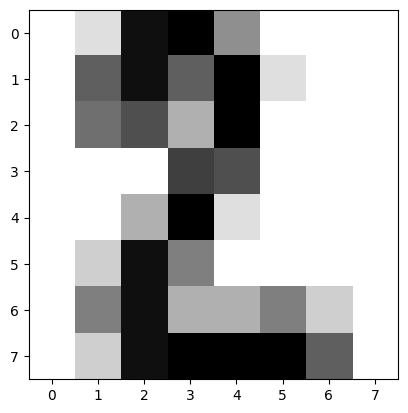

In [7]:
#Escolhe um ponto aleatório
digito = X_train[99]

#plot do digito
plt.imshow(digito.reshape(8,8),cmap=plt.cm.gray_r)

%time KNN_algoritmo(digito,X_train,y_train,k=5,p=2)

In [8]:
%time acuracy = print("Acurária = ",acuracia(X_test,y_test,k=5,p=2))

Acurária =  98.61111111111111
CPU times: total: 2.98 s
Wall time: 3.14 s


### Implementação do KNN do Scikit

In [9]:
#implementando o KNN do Scikit-learn

#instancia o objeto
KNN = KNeighborsClassifier(n_neighbors=5,p=2)
#Fit
%time KNN.fit(X_train,y_train)
#teste
y_pred = KNN.predict(X_test)
#Validação
print(classification_report(y_test, y_pred))

#classifica o digito
print("A classificação do KNN do Scikit é =",KNN.predict(digito.reshape(1,-1)))

CPU times: total: 0 ns
Wall time: 1 ms
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

A classificação do KNN do Scikit é = [2]


### Conclusão:
* Apresentam acurácia semelhante.
* O modelo do Scikit é mais rápido